<center>
    <img src="https://www.lespeeddating.com/img/cms/soiree_speed-dating-images.jpg" width="700" height="250">
</center>

# Speed Dating Experiment
_An analysis on the Speed Dating Experiment from [Kaggle](https://www.kaggle.com/annavictoria/speed-dating-experiment)_.

## Introduction

> Friendship at first sight, like love at first sight, is said to be the only truth. - _Herman Melville_

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender.


Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: 
- Attractiveness
- Sincerity
- Intelligence
- Fun 
- Ambition
- Shared interests

The dataset also includes questionnaire data gathered from participants at different moments in the process asking for demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.

This project is about exploring the dataset and trying to determine the key attributes that, _a priori_ lead to a second date.

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import plotly.graph_objects as go
print('Imports finished')

Imports finished


In [2]:
pd.options.display.max_columns = None
sns.color_palette("viridis", as_cmap=True)

In [3]:
# Charge the dataset
df = pd.read_csv("Speed Dating Data.csv", encoding= "unicode_escape")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [5]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

In [6]:
# Replacements derived from the documentation
df.rename(columns = {"gender": "gender", 
                 #   "condtn":"condition",
                #"mn_sat":"median_sat",
                #    "age_o":"age of partner",
                #    "race_o":"race of partner",
                #    "dec_o":"partners decision",
                #    "attr_o":"partner rating of attributes",
                    #"imprace":"race importance",
                    #"imprelig":"religion importance"
                    }, inplace=True)

race_replacement = {1:"Black",
                2: "White",
                3: "Hispanic",
                4: "Asian",
                5: "Native",
                6: "Other"}

field_replacement = {1: 'Law', 
                2: 'Math', 
                3: 'Soc. Sc.', 
                4: 'Med. Sc.',
                5: 'Eng.', 
                6: 'Journ.', 
                7: 'Hist.', 
                8: 'Econ', 
                9: 'Educ.',
                10: 'Nat. Sc.', 
                11: 'Soc. Wr.', 
                12: 'Und.', 
                13: 'Pol. Sc.',
                14: 'Film', 
                15: 'Arts', 
                16:'Lang.', 
                17: 'Arch.', 
                18: 'Oth.'}

career_replacement={1: "Lawyer",
                   2:  "Academic/Research",
                   3:  "Psychologist",
                   4:  "Doctor/Medicine",
                   5:  "Engineer",
                   6:  "Creative Arts/ Entertainment",
                   7:  "Banking/Consulting/Finance/Marketing/Business/CEO/ Entrepreneur / Admin",
                   8:  "Real Estate",
                   9:  "International/Humanitarian Affairs",
                   10:  "Undecided",
                   11:  "Social Work",
                   12:  "Speech Pathology",
                   13:  "Politics",
                   14:  "Pro Sports/Athletics",
                   15:  "Other",
                   16:  "Journalism",
                   17:  "Architecture"}

decision_replacement={1:"Yes", 0:"No"}

length_replacement={1:"Too little",
                2: "Too much",
                3: "Just Right"}

goal_replacement={1:"Seemed like a fun night out",
                2: "To meet new people",
                3: "To get a date",
                4:"Looking for serious relationship",
                5:"To say I did it",
                6: "Other"}

frequency_replacement={1:"Several times a week",
                    2: "Twice a week",
                    3: "Once a week",
                    4: "Twice a month",
                    5: "Once a month",
                    6: "Several times a year",
                    7: "Almost never"}

In [7]:
df["gender"].replace({0:"Female",1:"Male"}, inplace=True)
df["condtn"].replace({1:"Limited choice", 2:"Extensive choice"}, inplace=True)
df["match"] = df["match"].apply(lambda x : "Yes" if x == 1 else "No")
df["samerace"] = df["samerace"].apply(lambda x : "Yes" if x == 1 else "No")
df["race"].replace(race_replacement, inplace=True)
df["dec_o"].replace(decision_replacement, inplace=True)
df["field_cd"].replace(field_replacement, inplace=True)
df["race"].replace(race_replacement, inplace=True)
df["career_c"].replace(career_replacement, inplace=True)
df["length"].replace(length_replacement, inplace=True)
df["numdat_2"].replace({1:"Too few", 2: "Too many", 3: "Just Right"}, inplace=True)
df["date_3"].replace({1:"Yes", 2:"No", 0:np.nan}, inplace=True)
df["goal"].replace(goal_replacement, inplace=True)
df["date"].replace(frequency_replacement, inplace=True)
df["go_out"].replace(frequency_replacement, inplace=True)
df["income"] = df['income'].str.replace(",", "").astype(float)

In [8]:
personal = ['gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
decision = ['match','dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met']
evaluation = ['satis_2', 'length', 'numdat_2']
outcome = ['you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3']

In [9]:
print(df.shape)
display(df.head())

(8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,Limited choice,1,10,7,NaN,4,1,11.0,No,0.14,No,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521",69487.0,To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,Limited choice,1,10,7,NaN,3,2,12.0,No,0.54,No,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521",69487.0,To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,Limited choice,1,10,7,NaN,10,3,13.0,Yes,0.16,Yes,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521",69487.0,To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,

In [10]:
# derive a dataset for the participants
df_un = df[['iid', 'wave'] + personal + evaluation + outcome].drop_duplicates()

In [53]:
df_un.head()

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,1,1,Female,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521",69487.0,To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,Too much,Too few,1.0,1.0,NaN,NaN,NaN
10,2,1,Female,24.0,law,Law,NaN,NaN,NaN,White,2.0,5.0,Alabama,"35,223",65929.0,Seemed like a fun night out,Once a month,Several times a week,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,Too much,NaN,0.0,0.0,NaN,NaN,NaN
20,3,1,Female,25.0,Economics,Math,NaN,NaN,NaN,White,8.0,4.0,Connecticut,"6,268",NaN,Other,Once a week,Several times a week,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,1,Female,23.0,Law,Law,NaN,NaN,NaN,White,1.0,1.0,Texas,"77,096",37754.0,Seemed like a fun night out,Once a month,Several times a week,lawyer/policy work,Lawyer,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,Just Right,Too many,0.0,0.0,NaN,NaN,NaN
40,5,1,Female,21.0,Law,Law,NaN,NaN,NaN,White,8.0,1.0,Bowdoin College,"94,022",86340.0,To meet new people,Twice a month,Several times a week,lawyer,Lawyer,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,Too much,Too many,0.0,0.0,NaN,NaN,NaN


## EDA - Who are the participants ?

### 1.1 Generalities

What does our dataset look like ?

In [11]:
print("Our dataset originally contains {} rows and {} columns".format(df.shape[0],df.shape[1]))
print()
print("{} people participated the experiment. There were {} waves and a total of {} matches".format(len(df['iid'].unique()) , len(df['wave'].unique()), len(df[df['match']=="Yes"])))
print()
print("The columns considered are:")
for i in df.columns:
    print(i,end=" ")

Our dataset originally contains 8378 rows and 195 columns

551 people participated the experiment. There were 21 waves and a total of 1380 matches

The columns considered are:
iid id gender idg condtn wave round position positin1 order partner pid match int_corr samerace age_o race_o pf_o_att pf_o_sin pf_o_int pf_o_fun pf_o_amb pf_o_sha dec_o attr_o sinc_o intel_o fun_o amb_o shar_o like_o prob_o met_o age field field_cd undergra mn_sat tuition race imprace imprelig from zipcode income goal date go_out career career_c sports tvsports exercise dining museums art hiking gaming clubbing reading tv theater movies concerts music shopping yoga exphappy expnum attr1_1 sinc1_1 intel1_1 fun1_1 amb1_1 shar1_1 attr4_1 sinc4_1 intel4_1 fun4_1 amb4_1 shar4_1 attr2_1 sinc2_1 intel2_1 fun2_1 amb2_1 shar2_1 attr3_1 sinc3_1 fun3_1 intel3_1 amb3_1 attr5_1 sinc5_1 intel5_1 fun5_1 amb5_1 dec attr sinc intel fun amb shar like prob met match_es attr1_s sinc1_s intel1_s fun1_s amb1_s shar1_s attr3_s sinc3_s 

We can see the majority of the participants didn't make it to the very last follow ups (e.g. : 3-4 weeks after they had been sent their matches).

In [12]:
def missing_values(df):
    missing = round(pd.DataFrame(df.isnull().sum()/len(df))*100,0)
    missing.columns = ['missing_values [%]']
    missing['missing_values [amount]'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values [%]', ascending=False)

display(missing_values(df))

,missing_values [%],missing_values [amount]
num_in_3,92.0,7710
date_3,82.0,6880
numdat_3,82.0,6882
expnum,79.0,6578
sinc7_2,77.0,6423
...,...,...
wave,0.0,0
condtn,0.0,0
idg,0.0,0
gender,0.0,0


The European/Caucasian American were the most represented in our dataset representing **55%** of the total data. The Black/African American were the least represented people.

In [13]:
display(round(df.groupby("race")["iid"].count() / len(df) * 100,2))

race
Asian       23.66
Black        5.01
Hispanic     7.93
Other        6.23
White       56.42
Name: iid, dtype: float64

The European/Caucasian American also received the most matches, which is proportional to their representativity in the dataset.

In [14]:
display(df[df["match"] == "Yes"].groupby("race")["iid"].count())

race
Asian       267
Black        85
Hispanic    123
Other       103
White       788
Name: iid, dtype: int64

We can get a look at the most represented races and (as stated before) the European/Caucasian American were the most represented while the Black/African American were the least.

545


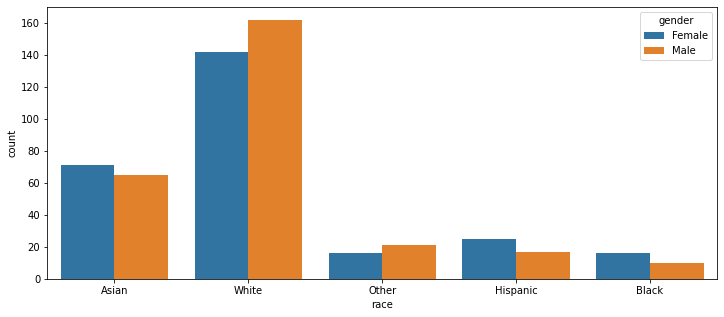

In [15]:
fig, ax = plt.subplots(figsize=(12,5))

df_race = df.groupby(['iid','race', "gender"]).size().reset_index()
print(df_race.race.value_counts().sum())

sns.countplot(x='race', hue='gender', data= df_race)#, kind ="count", aspect = 1.4)
plt.show()

What is the repartition of ages per race and gender among the participants ?

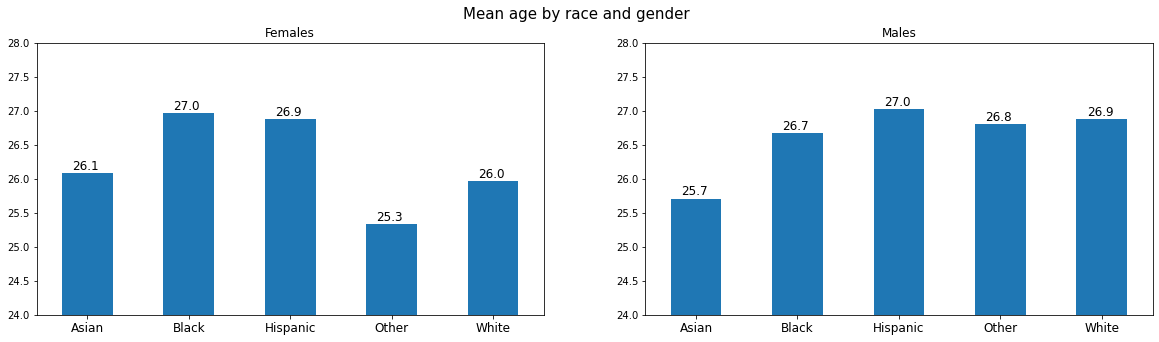

In [16]:
fig, ax= plt.subplots(1,2, figsize=(20, 5))

df[df['gender'] == "Female"][['age','race']].groupby('race').mean().plot(kind='bar', ax=ax[0], legend=False,title='Females', ylim=(24,28))
df[df['gender'] == "Male"][['age','race']].groupby('race').mean().plot(kind='bar', ax=ax[1], legend=False,title='Males', ylim=(24,28))


ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0].set_xlabel('',fontsize=1)
ax[1].set_xlabel('',fontsize=1)

fig.suptitle('Mean age by race and gender', fontsize=15)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.1, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.1, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

How are the incomes distributed among the participants ?

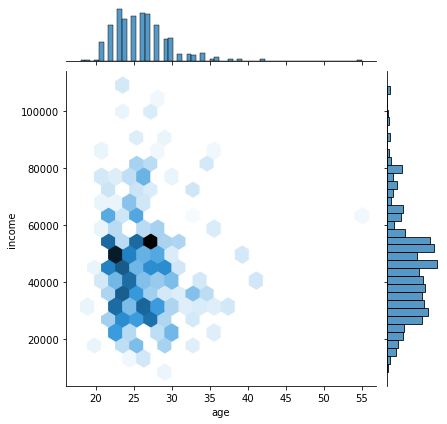

In [17]:
sns.jointplot(x='age', y='income', data=df, kind='hex', gridsize=20)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-pack

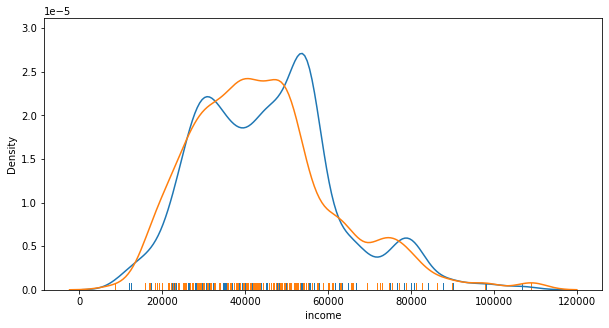

In [18]:
fig, axes= plt.subplots(figsize=(10, 5))
sns.distplot(df.income[df['gender']=='Male'].dropna(), rug=True,label= "Male",hist=False)
sns.distplot(df.income[df['gender']=='Female'].dropna(), rug=True,label= "Female",hist=False)
plt.show()

We can also have a look at the repartition of job types per gender.

['Academic/Research', 'Banking/Consulting/Finance/Marketing/Business/CEO/ Entrepreneur / Admin', 'Lawyer', 'Creative Arts/ Entertainment', 'International/Humanitarian Affairs', 'Doctor/Medicine', 'Undecided', 'Psychologist', 'Engineer', 'Social Work', 'Other', 'Politics', 'Real Estate', 'Speech Pathology', 'Journalism', 'Pro Sports/Athletics', 'Architecture']
[152, 144, 47, 46, 35, 26, 25, 17, 14, 14, 5, 5, 3, 2, 2, 1, 1]
[104, 66, 29, 21, 12, 11, 10, 8, 4, 3, 3, 1, 1, 1]


<AxesSubplot:>

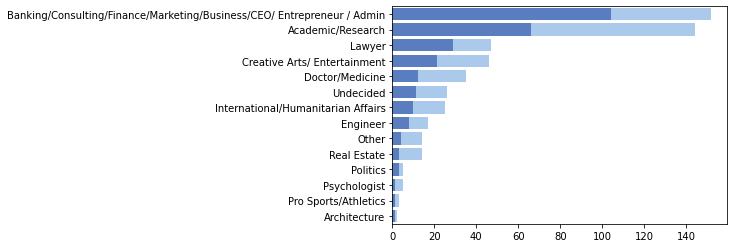

In [41]:
# A finaliser !
career = df_un.career_c.value_counts()
print(career.index.to_list())
print(career.to_list())

careerM = df_un[df_un['gender'] == "Male"].career_c.value_counts() 
print(careerM.tolist())

sns.set_color_codes("pastel")
sns.barplot(x=career.to_list(), y=career.index.to_list(), label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x=careerM.to_list(), y=careerM.index.to_list(), label="Male", color="b")

### Slight dive into the attributes

What average importance do the people participating the experiment confer to the following attributes?
- Attractiveness
- Sincerity
- Intelligence
- Fun
- Ambition
- Shared interests

In [20]:
round(df.loc[df["iid"].unique()].pivot_table(index="gender", values=["pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha"]),2)

,pf_o_amb,pf_o_att,pf_o_fun,pf_o_int,pf_o_sha,pf_o_sin
gender,,,,,,
Female,5.36,30.45,18.05,21.02,9.05,17.00
Male,11.27,20.71,19.96,23.32,9.65,15.09


We can focus especially on the people who matched.

In [21]:
round(df.loc[df["iid"].unique()].loc[df["match"] == "Yes"].pivot_table(index="gender", values=["pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha"]),2)

,pf_o_amb,pf_o_att,pf_o_fun,pf_o_int,pf_o_sha,pf_o_sin
gender,,,,,,
Female,5.84,32.25,18.68,20.68,11.29,12.55
Male,12.18,16.76,22.85,22.61,10.42,15.18


We can say that in general men and women almost give identical ratings to the importance of being fun, intelligent, sharing the same interests and being sincere. 
However, **women give a greater importance to their partner's ambition** and **men rate attractiveness a lot more** than women do.

How does this analysis breakdown per race ?

In [22]:
round(df.loc[df["iid"].unique()].loc[df["match"] == "Yes"].pivot_table(index=["gender","race"], values=["pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha"]),2)

pf_o_amb  pf_o_att  pf_o_fun  pf_o_int  pf_o_sha  pf_o_sin
gender race                                                                
Female Asian         5.31     31.08     19.85     21.46     11.31     12.54
       Black         8.00     25.00     17.00     23.00     14.00     17.00
       Hispanic      8.33     25.00     16.67     21.67      6.67     21.67
       Other         4.86     39.14     19.71     19.14     10.29      6.86
       White         5.71     32.98     18.44     20.27     11.51     12.27
Male   Asian        13.30     14.77     25.80     20.57      9.77     15.80
       Hispanic     14.39     14.70     21.06     22.42     11.36     16.06
       White        11.70     17.37     22.57     22.98     10.41     14.96

We can observe that in a nutshell Latino/Hispanix American males received the higher grades in terms of ambition and European/Caucasian American females received the higher mean grade of attractiveness.

We can have other insights by looking at the mean, min, max and median age per race.

In [23]:
df[['race', 'age']].groupby('race').agg(['mean', 'median', 'min', 'max'])

age                   
               mean median   min   max
race                                  
Asian     25.909183   26.0  18.0  55.0
Black     26.838095   27.0  20.0  36.0
Hispanic  26.933735   27.0  19.0  35.0
Other     26.114943   25.0  20.0  33.0
White     26.451757   26.0  21.0  42.0

In [24]:
df[['race', 'gender','age']].groupby(['gender','race']).agg(['mean', 'median', 'min', 'max'])

age                   
                      mean median   min   max
gender race                                  
Female Asian     26.087081   26.0  21.0  55.0
       Black     26.962656   26.0  20.0  36.0
       Hispanic  26.875931   26.0  19.0  35.0
       Other     25.330612   25.0  20.0  30.0
       White     25.965217   25.0  21.0  38.0
Male   Asian     25.710779   26.0  18.0  37.0
       Black     26.670391   27.0  23.0  30.0
       Hispanic  27.022989   28.0  22.0  32.0
       Other     26.808664   26.0  22.0  33.0
       White     26.875299   27.0  21.0  42.0

Which races got the most and the least matches ?

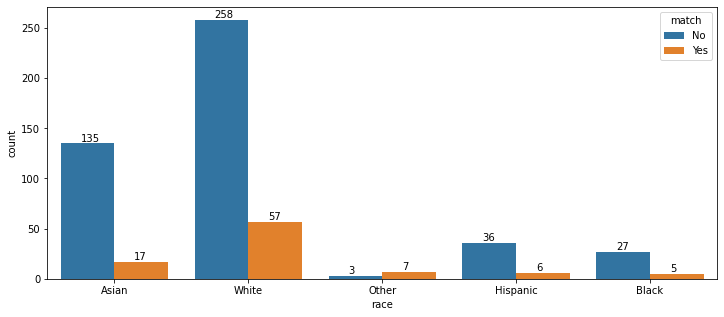

In [25]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="race",hue="match",data=df.loc[df["iid"].unique()])

for i in ax.patches:
    ax.text(i.get_x() + 0.15
    , i.get_height() + 2, \
            str(round((i.get_height()), 1)), fontsize=10)

In [26]:
print("There were {} matches between people of the same race."
    .format( len(df[(df["samerace"]=="Yes") & (df['match'] == "Yes")])))

There were 566 matches between people of the same race.


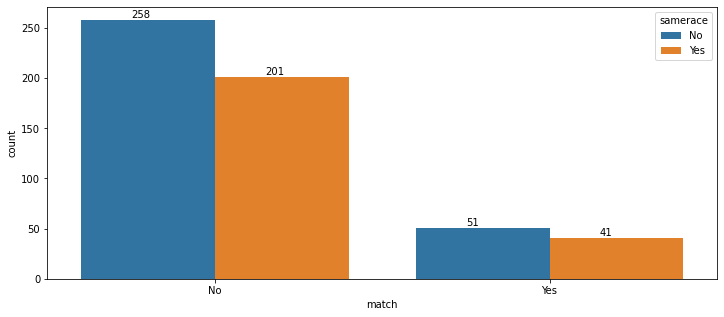

In [27]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="match",hue="samerace",data=df.loc[df["iid"].unique()])

for i in ax.patches:
    ax.text(i.get_x() + 0.15
    , i.get_height() + 2,
    str(round((i.get_height()), 1)), fontsize=10)

Text(0.5, 0, '')

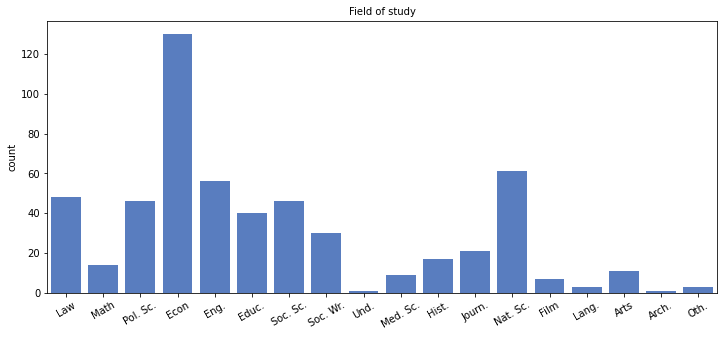

In [54]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x="field_cd", data=df_un,color='b')
plt.title('Field of study', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('')

In [29]:
pd.pivot_table(df.loc[df["iid"].unique()],index="field_cd",values="iid",aggfunc='count')

,iid
field_cd,
Econ,66
Educ.,16
Eng.,27
Law,181
Math,42
Pol. Sc.,40
Soc. Sc.,96
Soc. Wr.,64


How important was having the same ethnicity (`imprace`) and/or religion (`imprelig`) as their partner for the people that had matches ?

In [30]:
round(df.loc[df["iid"].unique()].loc[df["match"] == "Yes"].pivot_table(index="race", values=["imprace","imprelig"],aggfunc=["mean","median","min","max"]),0)

mean           median              min              max         
         imprace imprelig imprace imprelig imprace imprelig imprace imprelig
race                                                                        
Asian        3.0      4.0     2.0      4.0     1.0      1.0     9.0      6.0
Black        5.0      1.0     8.0      1.0     1.0      1.0     8.0      2.0
Hispanic     3.0      3.0     3.0      2.0     1.0      1.0     6.0      5.0
Other        1.0      1.0     1.0      1.0     1.0      1.0     1.0      1.0
White        3.0      3.0     1.0      1.0     1.0      1.0     9.0      8.0

Text(0.5, 1.0, 'Same religion importance')

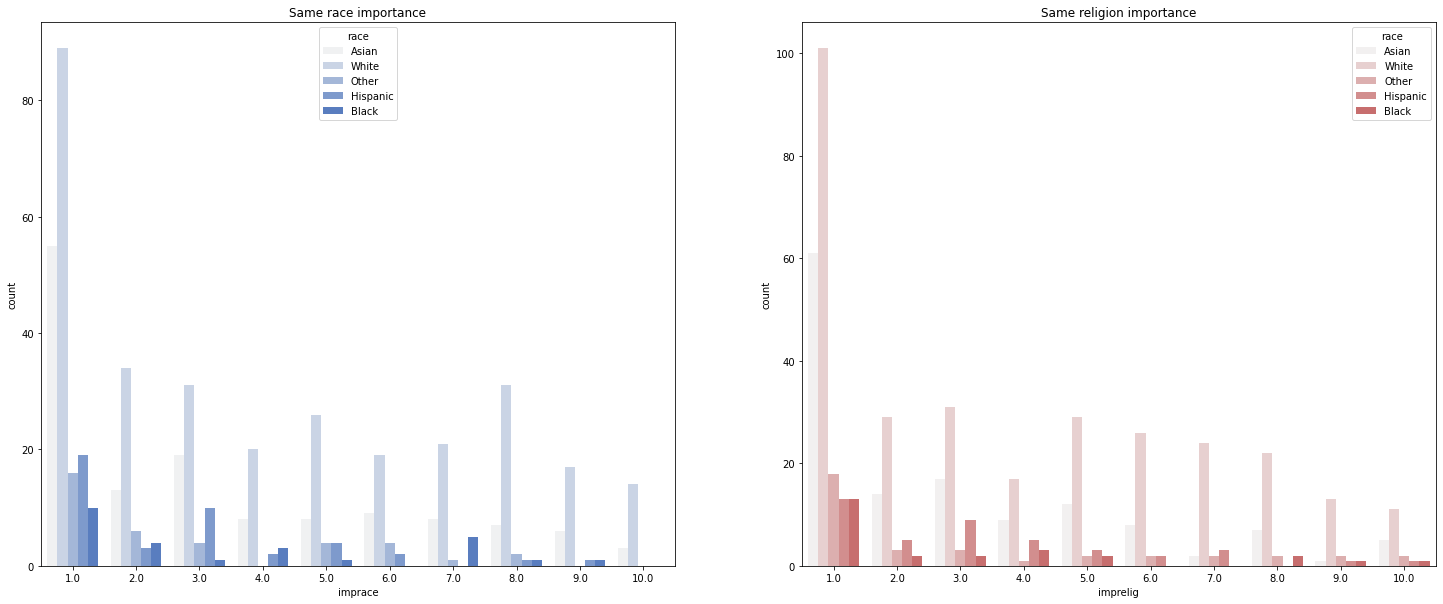

In [45]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.countplot(x=df_un.query('imprace > 0').imprace,color='b',hue=df_un.race)
plt.title("Same race importance")


plt.subplot(1,2,2)
sns.countplot(x=df_un.query('imprelig > 0').imprelig,color='r',hue=df_un.race)
plt.title("Same religion importance")

We can see that the being of the same racial background is the most important among Black/African American candidates and the least among European/Caucasian American ones. However, Black/African participants seem not to allow a huge importance to having the same spiritual beliefs.
Sharing the same religious background was the most important for the Asian/Pacific Islander/Asian-American.

We can also have a look at what were both the goals for participating in the event.

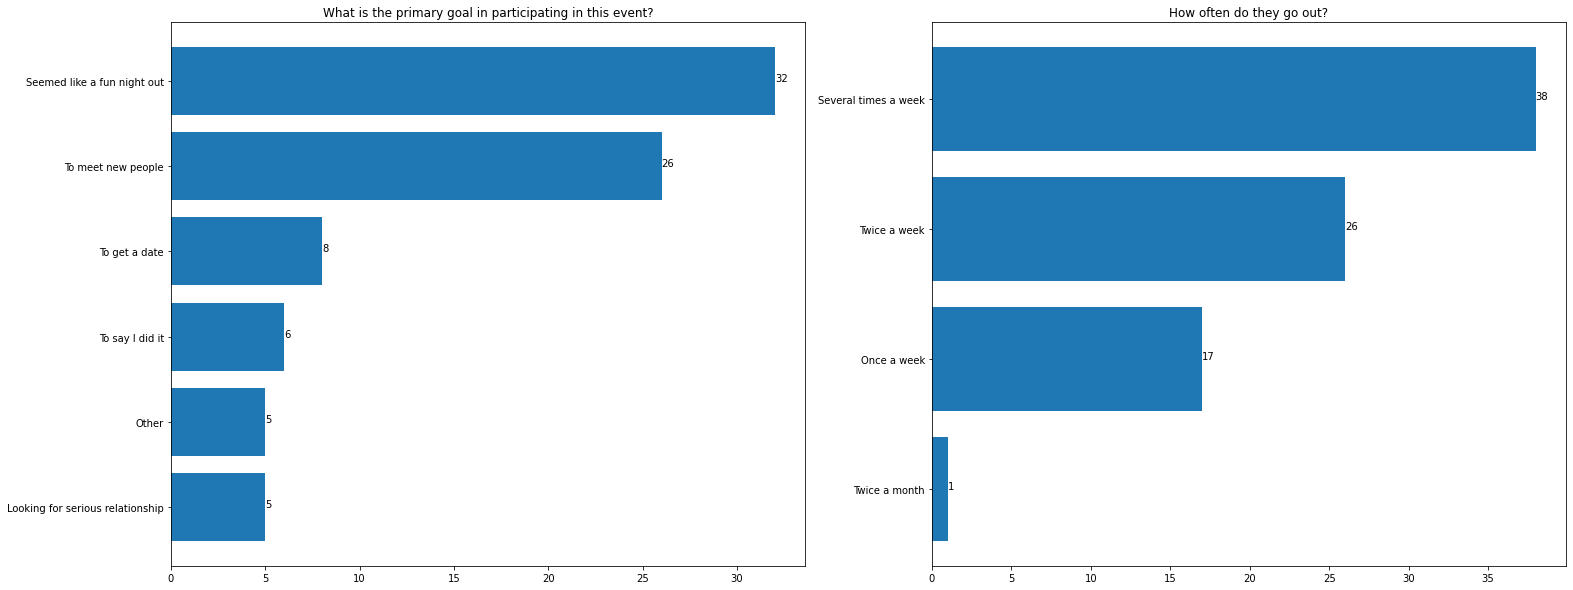

In [32]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.barh(y = df_un.loc[df['match'] == 'Yes']['goal'].value_counts().sort_values().index, 
         width = df_un.loc[df['match'] == 'Yes']['goal'].value_counts().sort_values().values)
plt.title("What is the primary goal in participating in this event?")
for i in range(0,6):
  plt.text(y = df_un.loc[df['match'] == 'Yes']['goal'].value_counts().sort_values().index[i],
           x = df_un.loc[df['match'] == 'Yes']['goal'].value_counts().sort_values().values[i],
           s = df_un.loc[df['match'] == 'Yes']['goal'].value_counts().sort_values().values[i])



plt.subplot(1,2,2)
plt.barh(y = df_un.loc[df['match'] == 'Yes']['go_out'].value_counts().sort_values().index, 
         width = df_un.loc[df['match'] == 'Yes']['go_out'].value_counts().sort_values().values
         )
plt.title("How often do they go out?")
for i in range(0,4):
  plt.text(y = df_un.loc[df['match'] == 'Yes']['go_out'].value_counts().sort_values().index[i],
           x = df_un.loc[df['match'] == 'Yes']['go_out'].value_counts().sort_values().values[i],
           s = df_un.loc[df['match'] == 'Yes']['go_out'].value_counts().sort_values().values[i])

plt.show()

It seems like most participants wanted to try the Speed Dating experiment and were not looking for a serious relationship.

Finally, we can break down the waves by looking at the match rate per wave. We can see that the 18th, 2nd and 12th waves had the worst matches rate among all of them.

In [33]:
df['match2'] = df['match'].apply(lambda x : 1 if x == 'Yes'
                                            else 0)

<ipython-input-34-59a8fbc2e9bf>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)


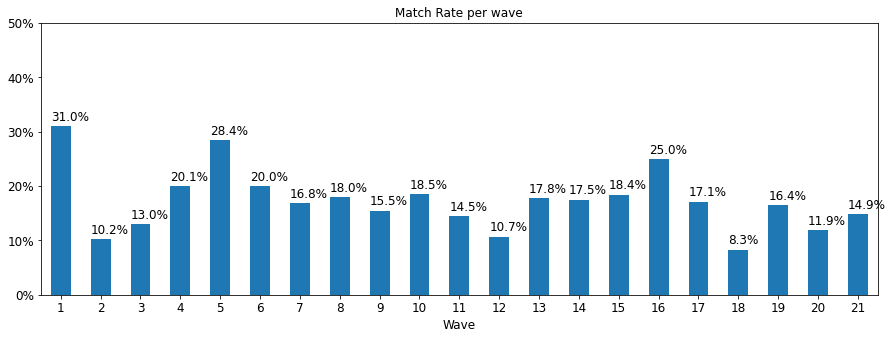

In [34]:
ax = df[['wave', 'match2']].groupby('wave').mean().plot(kind='bar', legend=False, figsize=(15,5),
                                                        ylim=(0,0.5))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('Wave', fontsize=12)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax.set_title('Match Rate per wave', fontsize=12)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.01, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

# Deep dive on the interests

## General Expectations

Participants were asked to give their feelings on how happy do they expect to be with the people they will meet on a scale 1-10.

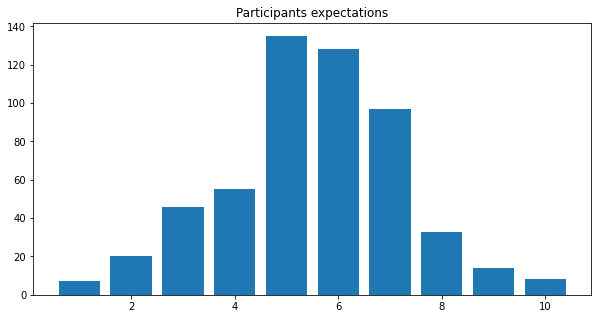

In [52]:
plt.figure(figsize=(10,5))
plt.title('Participants expectations')

plt.bar(x = df_un['exphappy'].value_counts().index,
        height = df_un['exphappy'].value_counts().values)


plt.show()

In [56]:
you_look = [col for col in df.columns if '1_1' in col] # what you look for in the opposite sex
other_look =  [col for col in df.columns if '4_1' in col] # you think other like you look for in the opposite sex
opp_look = [col for col in df.columns if '2_1' in col] # you think the opposite sex look for in you
you_score = [col for col in df.columns if '3_1' in col] # how do you score yourself
they_score = [col for col in df.columns if '5_1' in col] # the others score you
print(they_score)

['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']


In [59]:
tmp_norm = df[(df.wave < 6) | (df.wave > 9)].copy()
tmp_norm[['wave']+you_look+other_look].sample(10)

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
921,3,20.0,15.0,20.0,20.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4658,12,17.0,19.0,18.0,17.0,11.0,18.0,19.0,17.0,18.0,19.0,11.0,16.0
8340,21,40.0,20.0,20.0,20.0,0.0,0.0,25.0,5.0,20.0,20.0,15.0,15.0
465,2,10.0,10.0,30.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
1395,4,50.0,7.0,20.0,23.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1703,5,15.0,15.0,25.0,25.0,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7419,21,10.0,20.0,30.0,10.0,10.0,20.0,50.0,10.0,10.0,10.0,10.0,10.0
462,2,10.0,10.0,30.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
5395,14,30.0,20.0,30.0,5.0,5.0,10.0,30.0,20.0,10.0,10.0,0.0,10.0
6054,15,20.0,20.0,20.0,10.0,10.0,20.0,30.0,20.0,10.0,20.0,10.0,10.0


## What does a person looks for in a partner ?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


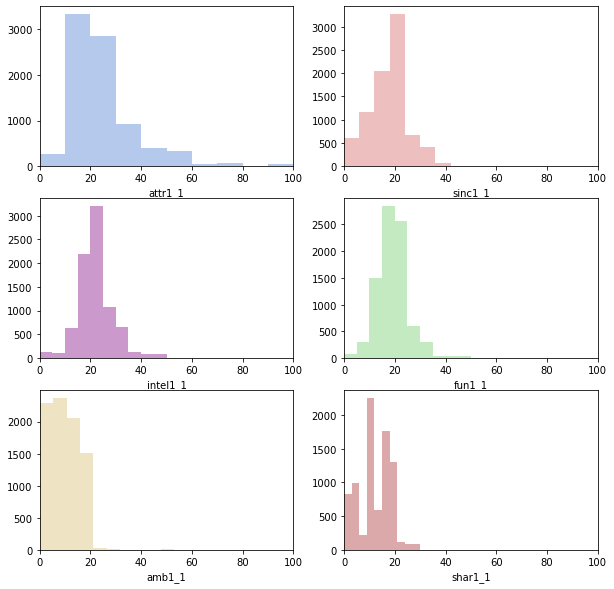

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(df.attr1_1,color='b',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,2)
sns.distplot(df.sinc1_1,color='r',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,3)
sns.distplot(df.intel1_1,color='purple',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,4)
sns.distplot(df.fun1_1,color='g',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,5)
sns.distplot(df.amb1_1,color='y',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,6)
sns.distplot(df.shar1_1,color='brown',bins=10,kde=False)
plt.xlim([0,100])

plt.show()

We can also have a look at what each participant thinks that their fellow men/women **MOST** look for in a date.

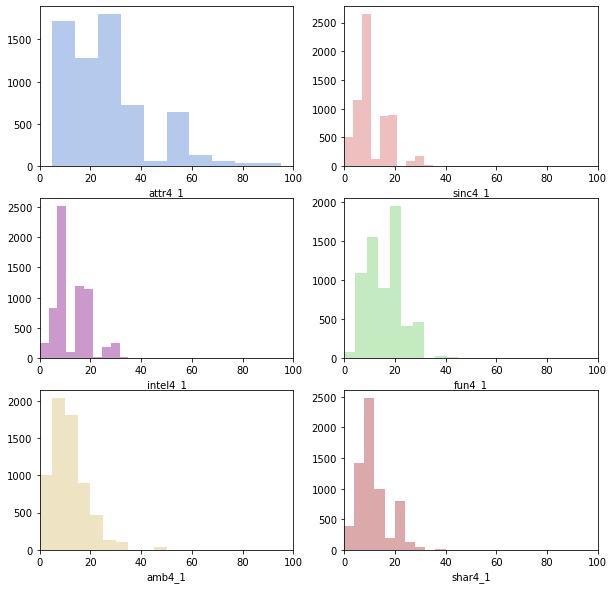

In [37]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.distplot(df.attr4_1,color='b',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,2)
sns.distplot(df.sinc4_1,color='r',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,3)
sns.distplot(df.intel4_1,color='purple',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,4)
sns.distplot(df.fun4_1,color='g',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,5)
sns.distplot(df.amb4_1,color='y',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,6)
sns.distplot(df.shar4_1,color='brown',bins=10,kde=False)
plt.xlim([0,100])


plt.show()

## What does a person thinks that their partner would look for ?

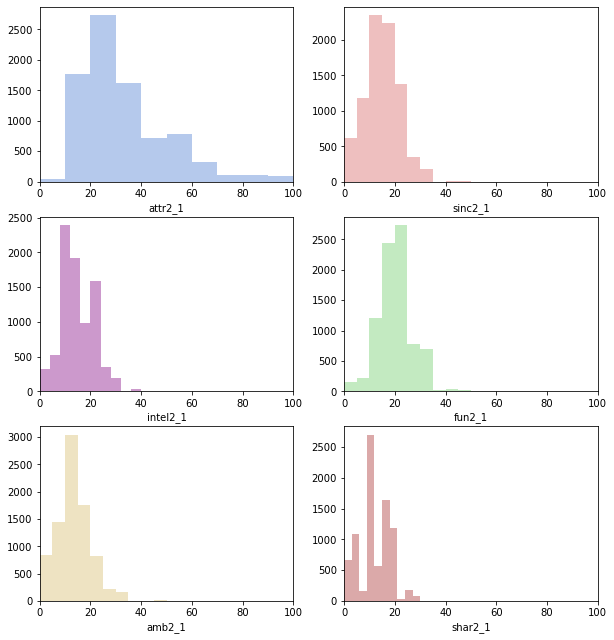

In [38]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)

plt.subplot(3,2,1)
sns.distplot(df.attr2_1,color='b',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,2)
sns.distplot(df.sinc2_1,color='r',bins=10,kde=False)
plt.xlim([0,100])


plt.subplot(3,2,3)
sns.distplot(df.intel2_1,color='purple',bins=10,kde=False)
plt.xlim([0,100])


plt.subplot(3,2,4)
sns.distplot(df.fun2_1,color='g',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,5)
sns.distplot(df.amb2_1,color='y',bins=10,kde=False)
plt.xlim([0,100])

plt.subplot(3,2,6)
sns.distplot(df.shar2_1,color='brown',bins=10,kde=False)
plt.xlim([0,100])

plt.show()

By now, we can say that:
- The participants look for all the categories more or less equally in general. 
- People generally think that attractiveness is a bit more important than other things.

## Self perception vs reality

Let's then see how people score themselves and how they think they are perceived.

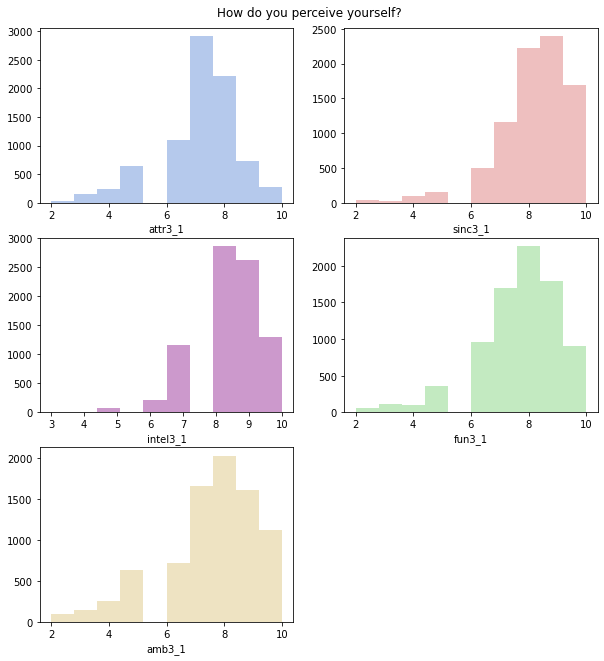

In [39]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)

plt.subplot(3,2,1)
sns.distplot(df.attr3_1,color='b',bins=10,kde=False)

plt.subplot(3,2,2)
sns.distplot(df.sinc3_1,color='r',bins=10,kde=False)


plt.subplot(3,2,3)
sns.distplot(df.intel3_1,color='purple',bins=10,kde=False)


plt.subplot(3,2,4)
sns.distplot(df.fun3_1,color='g',bins=10,kde=False)

plt.subplot(3,2,5)
sns.distplot(df.amb3_1,color='y',bins=10,kde=False)

plt.suptitle('How do you perceive yourself?')
plt.show()

Let's see how they do think the other ones perceive them.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


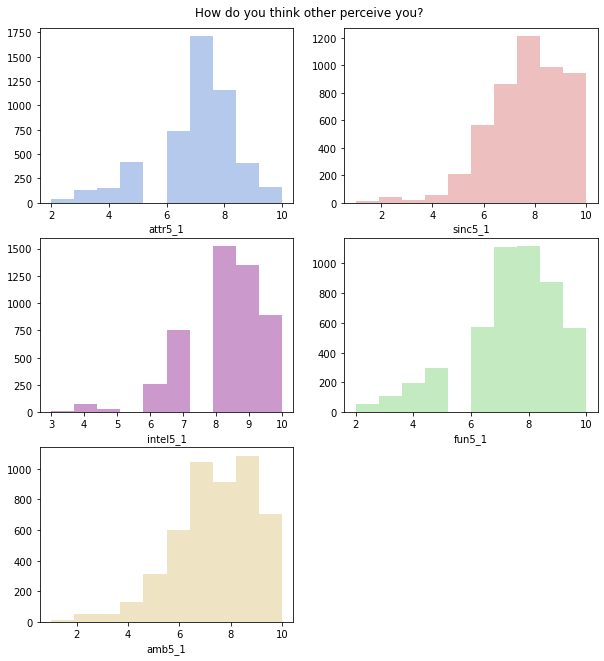

In [62]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)

plt.subplot(3,2,1)
sns.distplot(df.attr5_1,color='b',bins=10,kde=False)

plt.subplot(3,2,2)
sns.distplot(df.sinc5_1,color='r',bins=10,kde=False)

plt.subplot(3,2,3)
sns.distplot(df.intel5_1,color='purple',bins=10,kde=False)

plt.subplot(3,2,4)
sns.distplot(df.fun5_1,color='g',bins=10,kde=False)

plt.subplot(3,2,5)
sns.distplot(df.amb5_1,color='y',bins=10,kde=False)

plt.suptitle('How do you think other perceive you?')
plt.show()

There's enough to say that our participants are **quite confident** about themselves ! Let's finally see if their predictions were accurate.

Text(0.5, 1.0, 'Correlation between different evaluations')

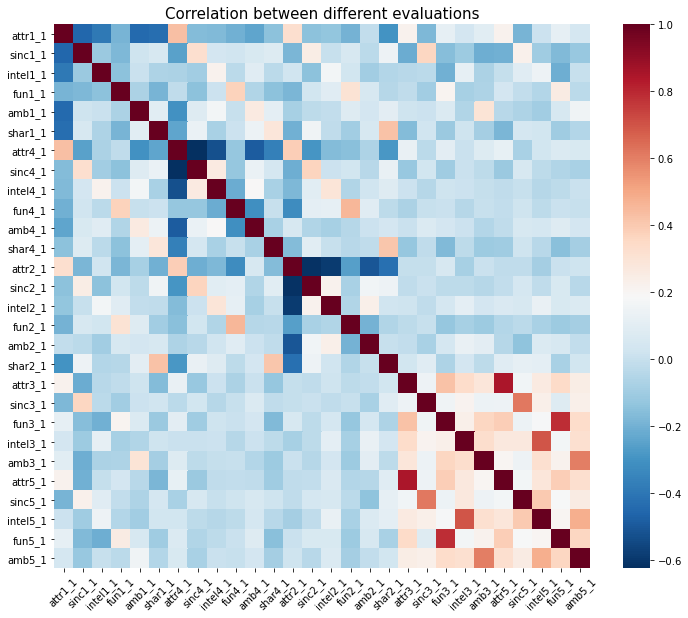

In [61]:
corr = tmp_norm[you_look + other_look + opp_look + you_score + they_score].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between different evaluations', fontsize=15)

We can (obviously?) see that the scores participants expect and how they measure up themselves strongly correlated (Fun, Intelligence, Attractiveness). One can also observe an opposite correlation between how they think other people value being attractive and the other categories, a correlation that becomes positive again if we look at how they think the two genders value this aspect.

# Conclusion

In a nutshell, love being a complex subject, it is almost impossible to fully summarize it based on a single experiment. However, the latter showed us some interesting results and we were able to make some observations, such as:
- a relationship between gender, race, and how important are race and religion, with the gender having a much higher weight
- people of different races like almost the same things (some exceptions may apply)
- white participants are way more confident than their Black and Asians fellow mates
- the attractiveness (or other key attributes) seems to be way more important of shared interest, race, and field of study
